In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.drop(['Unnamed: 0', 'salary', 'salary_currency', ], inplace = True, axis=1)

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [5]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


In [6]:
# check null in column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


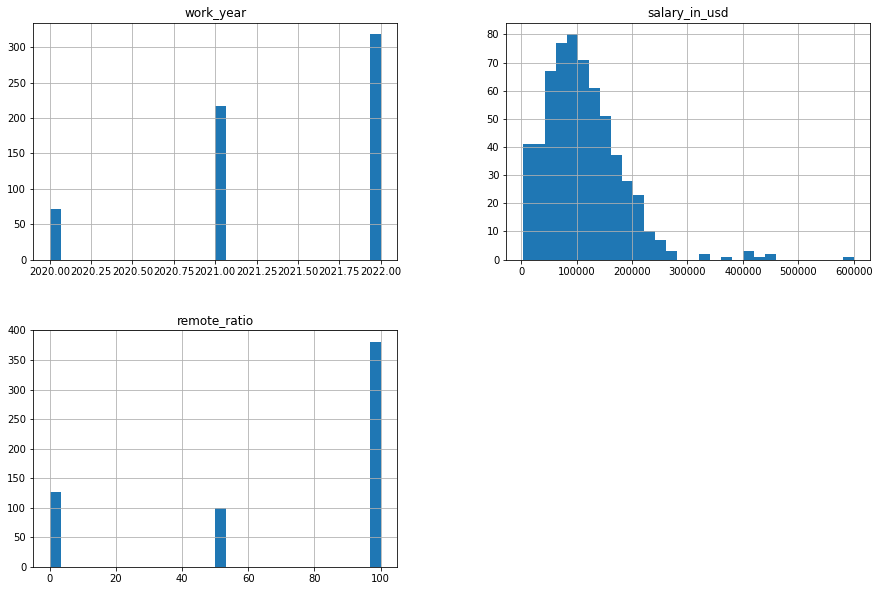

In [7]:
df.hist(bins=30, figsize=(15,10))
df.plot

## Data Clearning

In [8]:
data = ['work_year', 'experience_level', 'employment_type', 'job_title',
        'employee_residence', 'remote_ratio',
       'company_location', 'company_size']
for i in data:
    print(f"{i} = ", df[i].unique(), '\n')

work_year =  [2020 2021 2022] 

experience_level =  ['MI' 'SE' 'EN' 'EX'] 

employment_type =  ['FT' 'CT' 'PT' 'FL'] 

job_title =  ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied

In [9]:
# available job_title
job_title = df.groupby('job_title')['job_title'].count().sort_values()
job_title

job_title
3D Computer Vision Researcher                 1
NLP Engineer                                  1
Marketing Data Analyst                        1
Machine Learning Manager                      1
Lead Machine Learning Engineer                1
Head of Machine Learning                      1
Finance Data Analyst                          1
Data Specialist                               1
Data Analytics Lead                           1
Staff Data Scientist                          1
Big Data Architect                            1
Director of Data Engineering                  2
ETL Developer                                 2
Cloud Data Engineer                           2
Principal Data Analyst                        2
Financial Data Analyst                        2
Product Data Analyst                          2
Machine Learning Infrastructure Engineer      3
Data Science Engineer                         3
Lead Data Scientist                           3
Lead Data Analyst             

In [10]:
# if job_tile availablity less 4 put into other categary
other_cat = job_title[job_title <= 4]
title = lambda i:'other' if i in other_cat else i
df.job_title = df.job_title.apply(title)

In [11]:
# residence categary
residence = df.groupby('employee_residence')['employee_residence'].count().sort_values(ascending=False)
other_rd = residence[residence <= 2]
new_rd = lambda i: 'other' if i in other_rd else i
df.employee_residence = df.employee_residence.apply(new_rd)

In [12]:
# location catergary
location = df.groupby('company_location')['company_location'].count().sort_values(ascending=False)
other_loc = location[location <= 2]
new_loc = lambda i: 'other' if i in other_loc else i
df.company_location = df.company_location.apply(new_loc)

  # Pipeline

### Split data training and testing

* split data into train and test according to job title

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
ssplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in ssplit.split(df, df['job_title']):
    train, test = df.loc[train_index], df.loc[test_index]

In [14]:
X_train = train.drop(['salary_in_usd'], axis = 1)
y_train = train['salary_in_usd']
X_test = test.drop(['salary_in_usd'], axis = 1)
y_test = test['salary_in_usd']

### create pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#define pipeline
pipeline = Pipeline([
    ('encoder', OneHotEncoder()),
#     ('scale', StandardScaler())
])
pl = pipeline.fit_transform(X_train)

# Check Correlations

In [16]:
corr = df.corr()
corr['salary_in_usd'].sort_values()

remote_ratio     0.132122
work_year        0.170493
salary_in_usd    1.000000
Name: salary_in_usd, dtype: float64

array([[<AxesSubplot:xlabel='work_year', ylabel='work_year'>,
        <AxesSubplot:xlabel='salary_in_usd', ylabel='work_year'>,
        <AxesSubplot:xlabel='remote_ratio', ylabel='work_year'>],
       [<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>,
        <AxesSubplot:xlabel='salary_in_usd', ylabel='salary_in_usd'>,
        <AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>],
       [<AxesSubplot:xlabel='work_year', ylabel='remote_ratio'>,
        <AxesSubplot:xlabel='salary_in_usd', ylabel='remote_ratio'>,
        <AxesSubplot:xlabel='remote_ratio', ylabel='remote_ratio'>]],
      dtype=object)

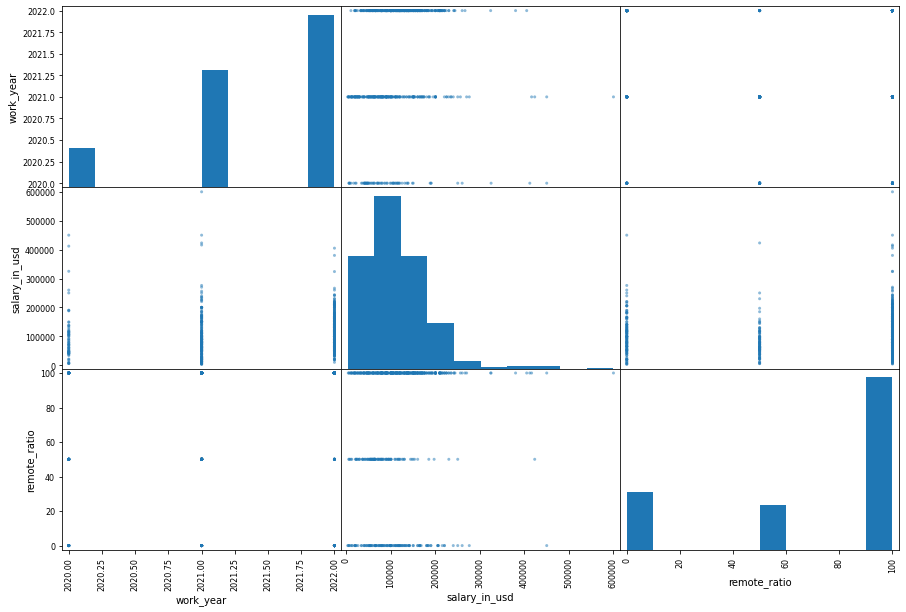

In [17]:
scatter = pd.plotting.scatter_matrix
scatter(df, figsize= (15, 10))

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

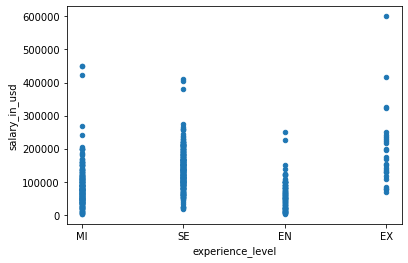

In [18]:
df.plot(kind = 'scatter', x= 'experience_level', y='salary_in_usd')

# Create Model

### Ridge and Lasso Regression

In [19]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [20]:
# define model - ridge regression
# ridge regression (L2 Regularization) use to scale down value of coffiecent(loss + penalty)
# alpha hyperparameter
model = Ridge(alpha=1.0)

In [21]:
model.fit( pl, y_train)

Ridge()

In [22]:
test_pl = pipeline.transform(X_test)
model.predict(test_pl)

array([150092.52589854, 123662.4632513 , 148447.02173507, 180477.48320016,
        84148.20945588, 115644.26928856, 148447.02173507,  56023.59528893,
       121440.82203433, 119591.98341323, 102192.79061036, 163929.04451054,
        40545.20093647, 191606.56526872, 102475.67262878, 198292.7461361 ,
       133013.25730678,  86042.40032398,  78680.21608441,  66280.98091625,
       157818.15553368, 108642.72377407,  97433.01761246,  90963.7695748 ,
       139919.34732547, 148447.02173507,  45859.70828768, 148447.02173507,
       137734.13409909,  52519.01288402,  74859.13685919,  10701.2600703 ,
         8243.8725205 ,  47197.14809109, 171956.35640646, 125141.9721332 ,
        21624.56052889,  27209.98679876, 157818.15553368, 117153.29413888,
       133033.59704991, 133256.21197961, 220387.63962832, 157818.15553368,
       135347.28896612, 137734.13409909,  25573.45086602, 135854.85976918,
        24243.41287214,  28560.27204224, 185090.87182162, 192075.16048725,
       143746.48468589, 1

In [23]:
y_test

142    150000
542    206699
337    243900
88     170000
510    150000
        ...  
264     25532
381    101570
596    210000
166     80000
271     18907
Name: salary_in_usd, Length: 122, dtype: int64

In [24]:
# RepeatedKFold cross validator(number_of_splits, number_of_repetation_kfold, random_state-set contant value)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=4)
scores = cross_val_score(model,pl, y_train, cv=cv, scoring='neg_mean_absolute_error')

In [25]:
print(f" Mean = {np.mean(scores)}\n\n Standard Deviation = {np.std(scores)}\n" )
print('RMSE = ', np.sqrt(-np.mean(scores)))

 Mean = -33055.47852629492

 Standard Deviation = 4820.176994048398

RMSE =  181.81165673931613


In [26]:
model.score(test_pl, y_test)

0.47258356233619436

* RidgeCV

In [27]:
model2 = RidgeCV(scoring = 'neg_mean_absolute_error', cv=cv, fit_intercept = True)
reg = model2.fit(pl, y_train)

In [28]:
reg.alpha_

10.0

In [29]:
reg.predict(test_pl)

array([162436.19719025, 124211.52520727, 149447.04422343, 177582.81393245,
        61037.54760871, 117792.38052601, 149447.04422343,  54176.89272359,
       118884.3835092 , 124240.32121157, 120235.67681088, 163568.33152584,
        43140.21767451, 161080.53851268,  94024.98070277, 182563.28018795,
       133983.65434847,  92426.78079598,  78068.30513818,  66903.9480845 ,
       155799.64122882, 111856.71754508, 101810.36000086,  88666.93503895,
       140227.10080278, 149447.04422343,  47787.5260926 , 149447.04422343,
       135093.96536377,  61873.64536298,  79817.82451617,  15590.8282387 ,
        31944.16069604,  63213.77116626, 168142.38222449, 123825.84369479,
        27307.67297589,  35104.76092291, 155799.64122882, 118695.01081415,
       130564.12221266, 152042.35368715, 205539.13511642, 155799.64122882,
       136349.80153696, 135093.96536377,  39754.17976448, 138178.92255445,
        29928.96438969,  53740.75906679, 174528.7353917 , 182137.16857029,
       144917.20107232, 1

In [30]:
reg.intercept_

82251.00245683012

In [31]:
# find alpha using grid search
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['alpha'] = [0, 10, 0.1]

In [32]:
# define search
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error', cv=cv)

In [33]:
search_reg = search.fit(pl, y_train)

In [34]:
search.best_params_

{'alpha': 10}

### Lasso

In [35]:
models = Lasso(alpha=1.0, tol=1)

In [36]:
models.fit(pl, y_train)

Lasso(tol=1)

In [37]:
models.predict(test_pl)

array([139727.33847557, 126438.57431745, 153151.42940891, 175961.43385375,
       113266.75007489, 105389.60896818, 153151.42940891,  42503.28355698,
       125924.69752483, 128111.63877857,  68601.90788157, 176607.8988329 ,
        47292.58071911, 213338.85615647, 115288.77319662, 211269.7058127 ,
       110516.33605928, 110756.34591855,  80778.30037434,  66446.18940793,
       157121.5914575 ,  98781.90059093,  90532.46416735,  98116.32255802,
       138002.63649501, 153151.42940891,  60288.32322052, 153151.42940891,
       131300.90111703,  51074.6850469 ,  86461.41321264,  -9759.45249069,
        24568.29113571,   9461.51778365, 165632.01996322, 126401.83518555,
        27749.95904096,  42299.28043653, 157121.5914575 , 119081.30264486,
       130408.73636604, 136084.21653516, 215548.69650237, 157121.5914575 ,
       133452.58303191, 131300.90111703,  32985.68305999, 148252.36347744,
        11713.41226828,  22904.58453509, 189645.55258822, 195767.39655169,
       152259.26465793, 1

In [38]:
y_test[:15]

142    150000
542    206699
337    243900
88     170000
510    150000
276     58000
504    115000
237     46809
183     61896
330    112900
73     150000
428    140400
530     85000
190    152000
1      260000
Name: salary_in_usd, dtype: int64

In [39]:
scores = cross_val_score(models, pl, y_train, cv=cv, scoring='neg_mean_absolute_error')

In [40]:
print(f" Mean = {np.mean(scores)}\n\n Standard Deviation = {np.std(scores)}" )

 Mean = -34417.11345185331

 Standard Deviation = 5291.89615555311
